# Multiple Linear Regression
## Bike Sharing Case Study

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [47]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [48]:
import numpy as np
import pandas as pd

In [49]:
biked =pd.read_csv('E:\ML\Regression\Multiple linear regression\Assignemt\day.csv')

In [50]:
# Check the head of the dataset
biked.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Inspect the various aspects of the housing dataframe

In [51]:
biked.shape

(730, 16)

In [52]:
biked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [53]:
biked.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

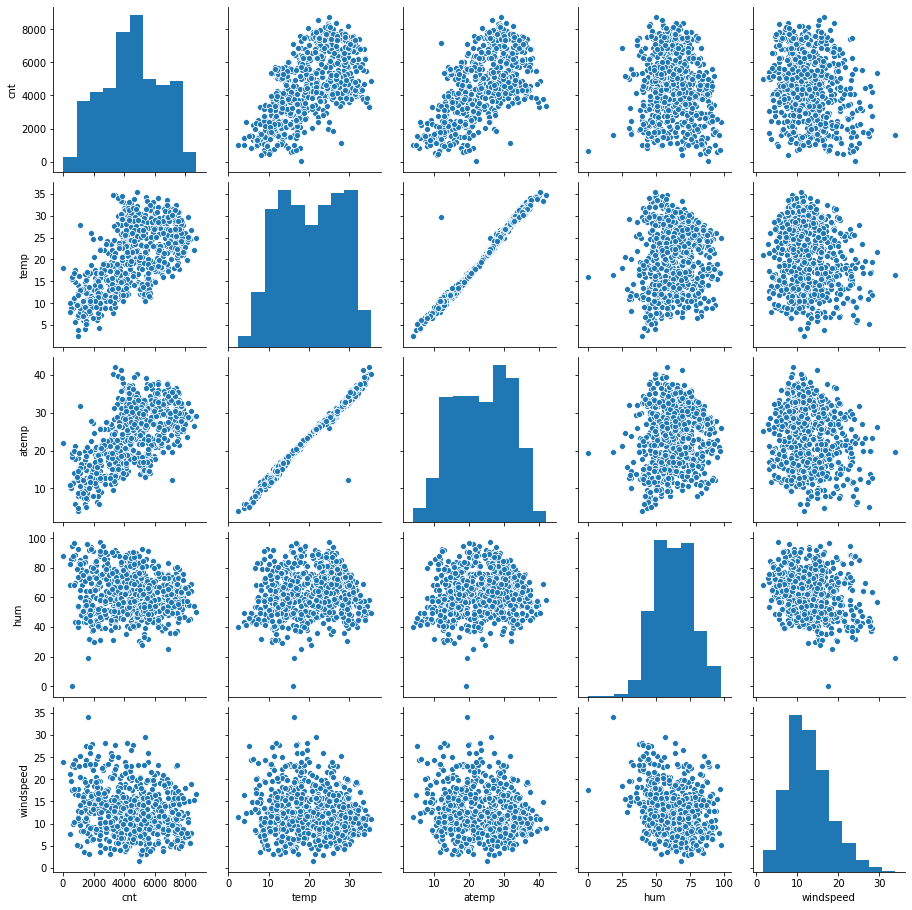

In [55]:
sns.pairplot(data=biked,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

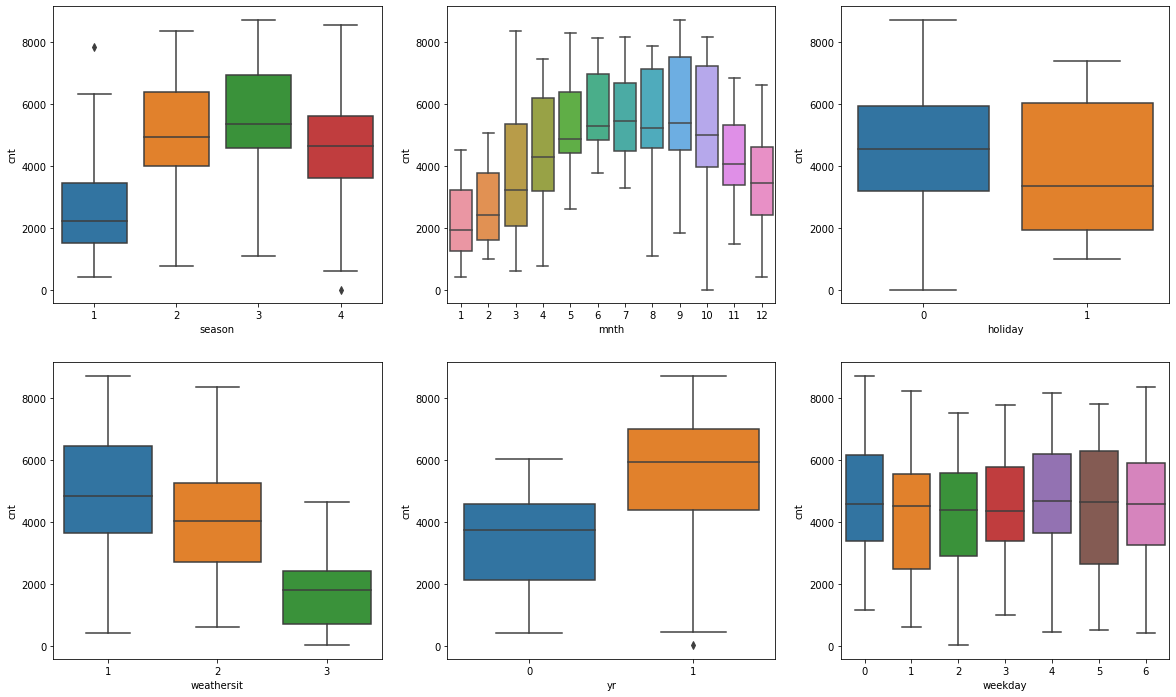

In [56]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = biked)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = biked)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = biked)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data =biked)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = biked)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = biked)
plt.show()

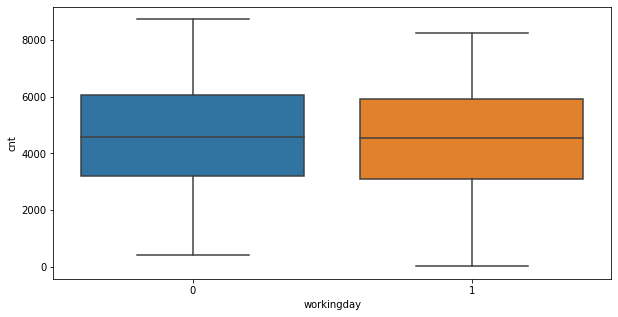

In [57]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = biked)
plt.show()

 - The count of bike sharing is least for spring
 - The number of bike shares incresed in 2019
 - The cnt values increases in summer months
 - The cnt values ars less during holidays

## Step 3: Data Preparation

In [58]:
## dropping columns that are irrelevant for the model -
biked.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)


In [59]:
biked.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [60]:
# Converting some numeric values to categorical data
import calendar
biked['mnth'] = biked['mnth'].apply(lambda x: calendar.month_abbr[x])

In [61]:
# maping seasons
biked.season = biked.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [62]:
# mapping weathersit
biked.weathersit = biked.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [63]:
#mapping weekday
biked.weekday = biked.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [64]:
# Check the biked dataframe now

biked.head()

season  yr mnth  holiday    weekday  workingday     weathersit       temp  \
0  Spring   0  Jan        0     Monday           1  Mist & Cloudy  14.110847   
1  Spring   0  Jan        0    Tuesday           1  Mist & Cloudy  14.902598   
2  Spring   0  Jan        0  Wednesday           1          Clear   8.050924   
3  Spring   0  Jan        0   Thrusday           1          Clear   8.200000   
4  Spring   0  Jan        0     Friday           1          Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### Dummy Variables

In [66]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = biked[['season','mnth','weekday','weathersit']]

In [67]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [70]:
## adding dummy variables to original dataset
biked = pd.concat([dummy,biked],axis = 1)

In [71]:
# Now let's see the head of our dataframe.
biked.head()

season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  mnth  holiday    weekday  \
0         1         0         0         0  ...   Jan        0     Monday   
1         1         0         0         0  ...   Jan        0    Tuesday   
2         1         0         0         0  ...   Jan        0  Wednesday   
3         1         0         0         0  ...   Jan        0   Thrusday   
4         1         0         0         0  ...   Jan        0     Friday   

   workingday     weathersit       temp     atemp      hum  windspeed   cnt  
0           1  Mist & Cloudy  14.110847  18.18125  80.5833  10.749882   985  
1           1  Mist & Cloudy  14.902598  17.68695  69.6087  16.652113   801  
2           1          Clear   8.050924   9.47025  43.7273  16.636703  1349  
3           1          Clear   8.200000  10.60610  59.0435  10.739832  1562  
4           1          Clear   9.305237  11.46350  43.6957  12.522300  1600  

[5 rows x 34 columns]

In [73]:
# dropping columns for which dummy variables were created
biked.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [74]:
biked.head()

season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  weathersit_Light Snow & Rain  \
0         1         0         0         0  ...                             0   
1         1         0         0         0  ...                             0   
2         1         0         0         0  ...                             0   
3         1         0         0         0  ...                             0   
4         1         0         0         0  ...                             0   

   weathersit_Mist & Cloudy  yr  holiday  workingday       temp     atemp  \
0                         1   0        0           1  14.110847  18.18125   
1                         1   0        0           1  14.902598  17.68695   
2                         0   0        0           1   8.050924   9.47025   
3                         0   0        0           1   8.200000  10.60610   
4                         0   0        0           1   9.305237  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600  

[5 rows x 30 columns]

In [76]:
biked.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets


In [78]:
import sklearn 
from sklearn.model_selection import train_test_split

In [79]:
train, test = train_test_split(biked, train_size = 0.7, random_state = 100)

## Step 5: Rescaling the Features

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [82]:
scaler = MinMaxScaler()

In [83]:
## Apply scaler() to all the columns except the 'dummy' variables

num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] =scaler.fit_transform(train[num_vars])

In [84]:
train.head()

season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  \
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         0         1   
482              0              1              0         0         0   
111              0              1              0         0         0   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  \
576         0         0         1         0         0  ...   
426         0         0         0         0         1  ...   
728         0         0         0         0         0  ...   
482         0         0         0         0         0  ...   
111         0         0         0         0         0  ...   

     weathersit_Light Snow & Rain  weathersit_Mist & Cloudy  yr  holiday  \
576                             0                         0   1        0   
426                             0                         1   1        0   
728                             0                         0   1        0   
482                             0                         1   1        0   
111                             0                         1   0        0   

     workingday      temp     atemp       hum  windspeed       cnt  
576           1  0.815169  0.766351  0.725633   0.264686  0.827658  
426           0  0.442393  0.438975  0.640189   0.255342  0.465255  
728           1  0.245101  0.200348  0.498067   0.663106  0.204096  
482           0  0.395666  0.391735  0.504508   0.188475  0.482973  
111           0  0.345824  0.318819  0.751824   0.380981  0.191095  

[5 rows x 30 columns]

In [85]:
train.describe()

season_Spring  season_Summer  season_Winter    mnth_Aug    mnth_Dec  \
count     510.000000     510.000000     510.000000  510.000000  510.000000   
mean        0.243137       0.247059       0.247059    0.096078    0.084314   
std         0.429398       0.431725       0.431725    0.294988    0.278131   
min         0.000000       0.000000       0.000000    0.000000    0.000000   
25%         0.000000       0.000000       0.000000    0.000000    0.000000   
50%         0.000000       0.000000       0.000000    0.000000    0.000000   
75%         0.000000       0.000000       0.000000    0.000000    0.000000   
max         1.000000       1.000000       1.000000    1.000000    1.000000   

         mnth_Feb    mnth_Jan    mnth_Jul    mnth_Jun    mnth_Mar  ...  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  ...   
mean     0.066667    0.088235    0.076471    0.076471    0.098039  ...   
std      0.249689    0.283915    0.266010    0.266010    0.297660  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       weathersit_Light Snow & Rain  weathersit_Mist & Cloudy          yr  \
count                    510.000000                510.000000  510.000000   
mean                       0.029412                  0.345098    0.507843   
std                        0.169124                  0.475867    0.500429   
min                        0.000000                  0.000000    0.000000   
25%                        0.000000                  0.000000    0.000000   
50%                        0.000000                  0.000000    1.000000   
75%                        0.000000                  1.000000    1.000000   
max                        1.000000                  1.000000    1.000000   

          holiday  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.711765    0.537440    0.513156    0.650480    0.320883   
std      0.157763    0.453386    0.225858    0.212410    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      0.000000    1.000000    0.542596    0.529718    0.653714    0.296763   
75%      0.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt  
count  510.000000  
mean     0.513499  
std      0.224421  
min      0.000000  
25%      0.356420  
50%      0.518638  
75%      0.684710  
max      1.000000  

[8 rows x 30 columns]

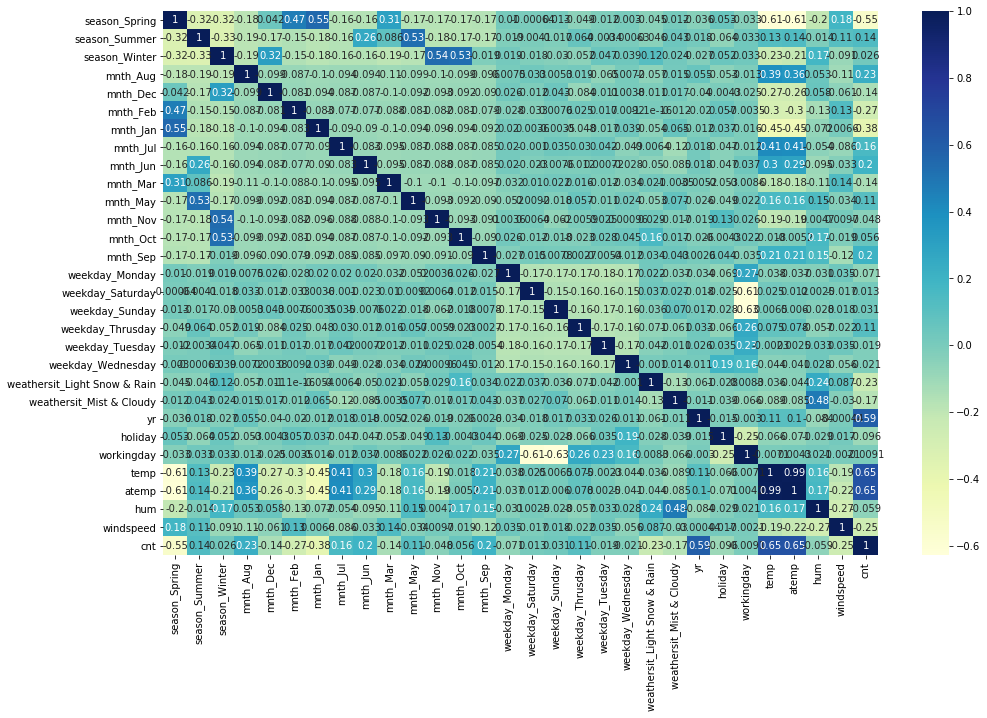

In [90]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### We'll first build a model using all the columns

### Dividing into X and Y sets for the model building

In [91]:
y_train = train.pop('cnt')
X_train = train

## Step 6: Building a linear model

In [92]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [93]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 11),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', False, 7),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 16),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Starting with all the columns selected by RFE

####  Model 1

In [94]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [104]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

In [105]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [106]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [107]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [102]:
lm.params

const                           0.296412
season_Spring                  -0.051890
season_Summer                   0.050206
season_Winter                   0.091897
mnth_Jan                       -0.033302
mnth_Jul                       -0.055623
mnth_Sep                        0.082695
weathersit_Light Snow & Rain   -0.239224
weathersit_Mist & Cloudy       -0.052598
yr                              0.230087
holiday                        -0.096280
temp                            0.512418
hum                            -0.168078
windspeed                      -0.187384
dtype: float64

In [109]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          7.59e-190
Time:                        22:03:55   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [110]:
## dropping mnth_Jan since it has p > 0.05

In [112]:
X_train_new = X_train_rfe.drop(["mnth_Jan"], axis = 1)

### Model 2

In [113]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [114]:
lm= sm.OLS(y_train,X_train_lm).fit()

In [115]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.95e-190
Time:                        22:10:31   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2848      0.034      8.258      0.000       0.217       0.353
season_Spring                   -0.0564      0.021     -2.700      0.007      -0.097      -0.015
season_Summer                    0.0531      0.015      3.536      0.000       0.024       0.083
season_Winter                    0.0976      0.017      5.643      0.000       0.064       0.132
mnth_Jul                        -0.0572      0.018     -3.123      0.002      -0.093      -0.021
mnth_Sep                         0.0833      0.017      4.973      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
weathersit_Mist & Cloudy        -0.0527      0.010     -5.017      0.000      -0.073      -0.032
yr                               0.2294      0.008     28.208      0.000       0.213       0.245
holiday                         -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                             0.5299      0.034     15.728      0.000       0.464       0.596
hum                             -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed                       -0.1822      0.026     -7.074      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF for new models

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
vif=pd.DataFrame()
X=X_train_new
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

features    VIF
0                          const  74.37
1                  season_Spring   5.02
10                          temp   3.61
3                  season_Winter   3.48
2                  season_Summer   2.62
11                           hum   1.89
7       weathersit_Mist & Cloudy   1.56
4                       mnth_Jul   1.48
5                       mnth_Sep   1.30
6   weathersit_Light Snow & Rain   1.24
12                     windspeed   1.19
8                             yr   1.03
9                        holiday   1.02

##### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [118]:
X_train_new =X_train_new.drop(['const'],axis=1)

In [119]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10                           hum  28.03
9                           temp  16.03
11                     windspeed   4.65
0                  season_Spring   4.01
2                  season_Winter   3.33
1                  season_Summer   2.79
6       weathersit_Mist & Cloudy   2.28
7                             yr   2.08
3                       mnth_Jul   1.58
4                       mnth_Sep   1.38
5   weathersit_Light Snow & Rain   1.24
8                        holiday   1.04

#### Model 3

In [120]:
### dropping hum from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

In [121]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

In [122]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          5.06e-187
Time:                        22:20:57   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1994      0.030      6.746      0.000       0.141       0.258
season_Spring                   -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_Summer                    0.0465      0.015      3.051      0.002       0.017       0.076
season_Winter                    0.0817      0.017      4.730      0.000       0.048       0.116
mnth_Jul                        -0.0521      0.019     -2.790      0.005      -0.089      -0.015
mnth_Sep                         0.0768      0.017      4.517      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
weathersit_Mist & Cloudy        -0.0802      0.009     -9.146      0.000      -0.097      -0.063
yr                               0.2336      0.008     28.352      0.000       0.217       0.250
holiday                         -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                             0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                       -0.1479      0.025     -5.887      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                           temp  5.09
10                     windspeed  4.60
1                  season_Summer  2.23
0                  season_Spring  2.08
7                             yr  2.07
2                  season_Winter  1.78
3                       mnth_Jul  1.58
6       weathersit_Mist & Cloudy  1.55
4                       mnth_Sep  1.34
5   weathersit_Light Snow & Rain  1.08
8                        holiday  1.04

### Step 7: Residual Analysis of the train data

In [124]:
y_train_pred=lm.predict(X_train_lm)

In [125]:
res=y_train-y_train_pred

Text(0.5, 0, 'Errors')

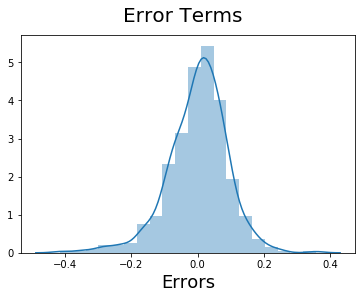

In [126]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets¶

In [127]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [128]:
test.describe()

season_Spring  season_Summer  season_Winter    mnth_Aug    mnth_Dec  \
count     220.000000     220.000000     220.000000  220.000000  220.000000   
mean        0.254545       0.263636       0.236364    0.059091    0.086364   
std         0.436599       0.441609       0.425817    0.236333    0.281541   
min         0.000000       0.000000       0.000000    0.000000    0.000000   
25%         0.000000       0.000000       0.000000    0.000000    0.000000   
50%         0.000000       0.000000       0.000000    0.000000    0.000000   
75%         1.000000       1.000000       0.000000    0.000000    0.000000   
max         1.000000       1.000000       1.000000    1.000000    1.000000   

         mnth_Feb    mnth_Jan    mnth_Jul    mnth_Jun    mnth_Mar  ...  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  ...   
mean     0.100000    0.077273    0.104545    0.095455    0.054545  ...   
std      0.300684    0.267633    0.306665    0.294512    0.227609  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       weathersit_Light Snow & Rain  weathersit_Mist & Cloudy          yr  \
count                    220.000000                220.000000  220.000000   
mean                       0.027273                  0.318182    0.481818   
std                        0.163248                  0.466833    0.500809   
min                        0.000000                  0.000000    0.000000   
25%                        0.000000                  0.000000    0.000000   
50%                        0.000000                  0.000000    0.000000   
75%                        0.000000                  1.000000    1.000000   
max                        1.000000                  1.000000    1.000000   

          holiday  workingday        temp       atemp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.036364    0.640909    0.558718    0.532847    0.638221    0.313293   
std      0.187620    0.480828    0.233187    0.217401    0.148694    0.159584   
min      0.000000    0.000000    0.046591    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.355429    0.344870    0.529197    0.198843   
50%      0.000000    1.000000    0.558172    0.544652    0.625590    0.300126   
75%      0.000000    1.000000    0.755981    0.713308    0.743798    0.402718   
max      1.000000    1.000000    0.984424    0.980934    1.002146    0.807474   

              cnt  
count  220.000000  
mean     0.522154  
std      0.219163  
min      0.048205  
25%      0.378595  
50%      0.524678  
75%      0.677750  
max      0.963300  

[8 rows x 30 columns]

##### Dividing into X_test and y_test

In [130]:
y_test = test.pop('cnt')
X_test = test

In [131]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [132]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         220 non-null    float64
 1   season_Spring                 220 non-null    uint8  
 2   season_Summer                 220 non-null    uint8  
 3   season_Winter                 220 non-null    uint8  
 4   mnth_Jul                      220 non-null    uint8  
 5   mnth_Sep                      220 non-null    uint8  
 6   weathersit_Light Snow & Rain  220 non-null    uint8  
 7   weathersit_Mist & Cloudy      220 non-null    uint8  
 8   yr                            220 non-null    int64  
 9   holiday                       220 non-null    int64  
 10  temp                          220 non-null    float64
 11  windspeed                     220 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [133]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test)

In [134]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8052680349048549

### Step 9: Model Evaluation

In [135]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Text(0, 0.5, 'y_pred')

In [136]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

Variables  Coefficient value
index                                                 
10                             temp           0.490988
8                                yr           0.233570
0                             const           0.199434
3                     season_Winter           0.081741
5                          mnth_Sep           0.076846
2                     season_Summer           0.046487
4                          mnth_Jul          -0.052057
1                     season_Spring          -0.067169
7          weathersit_Mist & Cloudy          -0.080167
9                           holiday          -0.097463
11                        windspeed          -0.147919
6      weathersit_Light Snow & Rain          -0.284199

##### We can see that the equation of our best fitted line is:

cnt = 0.199434 + 0.490988 X temp + 0.233570 X yr + 0.081741 X seasonWinter - 0.067169 X season Spring + 0.081741 X season_Winter -0.052057 X mnth_Jul + 0.076846 X mnth_Sep -0.284199 X weathersit_Light Snow & Rain --0.080167 X weathersit_Mist & Cloudy -0.097463 X holiday -0.147919X windspeed

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
##### All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays

This indicates that the bike rentals is majorly affected by temperature,season and month.